In [53]:
import os
import cv2
import shutil
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup

In [54]:
dir1 = './TRACKA_training/'
# dir2 = './TRACKB_training/'

In [55]:
data_lists = list(set([os.path.join(dir1, i.split('.')[0]).replace('\\', '/') for i in os.listdir(dir1)]))
# data_lists2 = list(set([os.path.join(dir2, i[:-4]).replace('\\', '/') for i in os.listdir(dir2)]))

# data_lists = data_lists1 + data_lists2

In [56]:
for data_name in tqdm(data_lists):

    xml_path = data_name + '.xml'

    data = open(xml_path, encoding='utf-8').read()
    soup = BeautifulSoup(data, 'lxml')

    datas = soup.find_all('coords')
    img_path = dir1 + soup.find_all('document')[0].attrs['filename']

    new_data = []
    for data in datas:
        _data = data.attrs['points']
        
        _data = _data.split(' ')
        _new_data = []

        for d in _data:
            _new_data.extend([int(i) for i in d.split(',')])
        x_min = min(_new_data[0], _new_data[2], _new_data[4], _new_data[6])
        y_min = min(_new_data[1], _new_data[3], _new_data[5], _new_data[7])
        x_max = max(_new_data[0], _new_data[2], _new_data[4], _new_data[6])
        y_max = max(_new_data[1], _new_data[3], _new_data[5], _new_data[7])
        
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        h, w = img.shape
        
        data1 = ((x_max-x_min)/2 + x_min)/w
        data2 = ((y_max-y_min)/2 + y_min)/h
        data3 = (x_max-x_min)/w
        data4 = (y_max-y_min)/h
        
        new_data.append('0 {} {} {} {}'.format(data1, data2, data3, data4))
    
    to_txt_path = (data_name + '.txt').replace('/TRACKA_training/', '/yolo/labels/')
    to_img_path = img_path.replace('/TRACKA_training/', '/yolo/images/').replace('TIFF', 'jpg').replace('png', 'jpg')
    
#     shutil.copyfile(img_path, to_img_path)
    with open(to_txt_path, 'w') as f:
        for d in new_data:
            f.write(d)
            f.write('\n')
            
    cv2.imwrite(to_img_path, img)

In [57]:
dir_img = './yolo/images'
data_lists = [os.path.join(dir_img, i).replace('\\', '/') for i in os.listdir(dir_img)]

In [58]:
from PIL import Image

In [59]:
img_path = data_lists[1024]
txt_path = img_path.replace('images', 'labels').replace('jpg', 'txt')

In [60]:
label_data = open(txt_path, encoding='utf-8').read().splitlines()

In [61]:
label = [float(i) for i in label_data[0].split(' ')]
print(label)

[0.0, 0.4993702770780856, 0.1907459867799811, 0.7141057934508817, 0.1397544853635505]


In [62]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
h, w = img.shape
_, center_x, center_y, _w, _h = label
center_x *= w
center_y *= h
_w *= w
_h *= h

x_min = center_x - _w / 2
y_min = center_y - _h / 2
x_max = center_x + _w / 2
y_max = center_y + _h / 2

In [63]:
import numpy as np
points = np.array([[[x_min, y_min], [x_max, y_min], [x_max, y_max], [x_min, y_max]]], dtype=np.int32)
_img = cv2.polylines(img, points, 1, 0, 2)

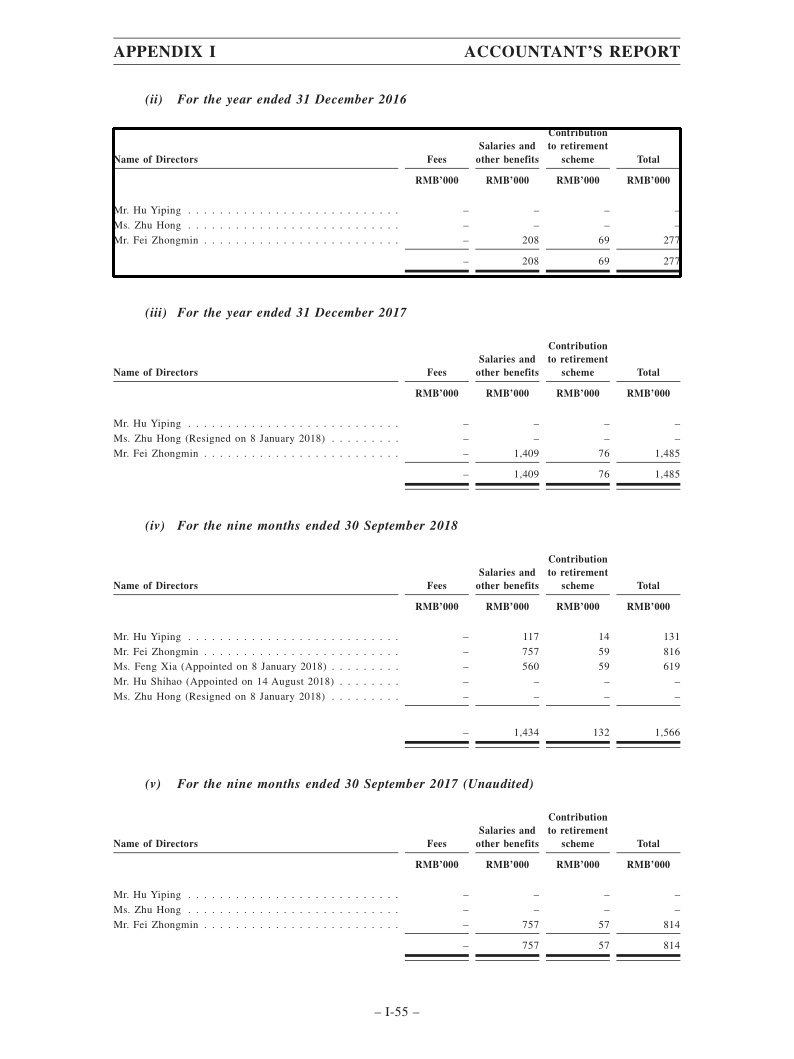

In [64]:
Image.fromarray(_img)

In [51]:
label_data

['0 0.4993702770780856 0.8371104815864022 0.7141057934508817 0.1388101983002833']